In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))
import modules.io as io
import matplotlib.pyplot as plt
import numpy as np

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import tensorflow as tf

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = '../config/googlenet_c30_train300k_aug10_clean_point.yaml'
LOAD = True

config      = io.load_yaml(CONFIG_FILE)

SCALE = config['CROP_DIMS']/2*config['SPACING']

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

5it [00:00, 47.64it/s]

centering images


231it [00:04, 46.63it/s]
100%|██████████| 1155/1155 [00:12<00:00, 91.03it/s]


In [4]:
X = data[0]
Y = data[1]
m = data[2]

print(X.shape)
print(Y.shape)

(1155, 160, 160)
(1155, 30)


In [5]:
print(Y[10])

[0.46875057 0.4535152  0.39098942 0.39670266 0.40267684 0.40576428
 0.40512086 0.4022164  0.39858474 0.39468275 0.39103251 0.38877571
 0.38888108 0.39088489 0.39217786 0.38971957 0.38431145 0.38024832
 0.38069634 0.38592453 0.39379767 0.40058329 0.40386199 0.40447636
 0.40475749 0.40496581 0.40320352 0.39825247 0.39227947 0.38871095]


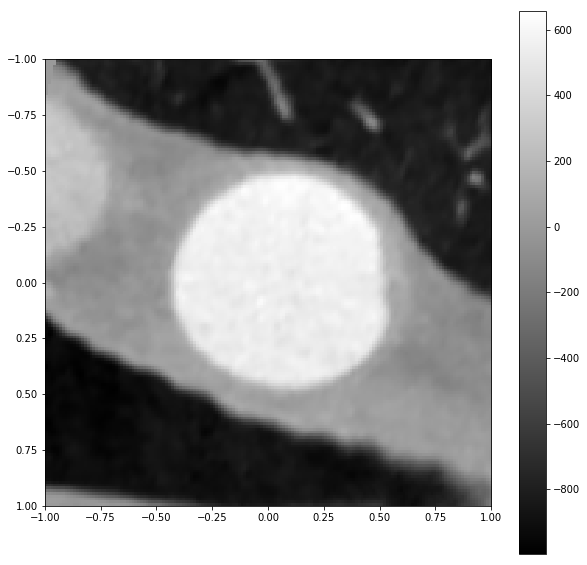

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(X[1], extent=[-1,1,1,-1], cmap='gray')
plt.colorbar()
plt.show()

[[-0.18481975 -0.09948783]
 [-0.17413042 -0.13053114]
 [-0.15602933 -0.15732329]
 [-0.13271646 -0.17863171]
 [-0.10649035 -0.1946875 ]
 [-0.07878122 -0.20697263]
 [-0.04936774 -0.2163651 ]
 [-0.01747862 -0.22181721]
 [ 0.01614674 -0.21976559]
 [ 0.0480375  -0.20718361]
 [ 0.07416102 -0.18478751]
 [ 0.09215382 -0.15581262]
 [ 0.10204992 -0.12400212]
 [ 0.10570291 -0.09193974]
 [ 0.10481387 -0.06034008]
 [ 0.09997453 -0.02889364]
 [ 0.09060855  0.00267834]
 [ 0.07517361  0.03359566]
 [ 0.05208219  0.06123073]
 [ 0.02130299  0.08149872]
 [-0.01457777  0.09118559]
 [-0.05163892  0.09014364]
 [-0.08683855  0.08008924]
 [-0.11827414  0.06264499]
 [-0.14463124  0.03922759]
 [-0.16498276  0.0112574 ]
 [-0.17898491 -0.01972144]
 [-0.18654113 -0.05242068]]


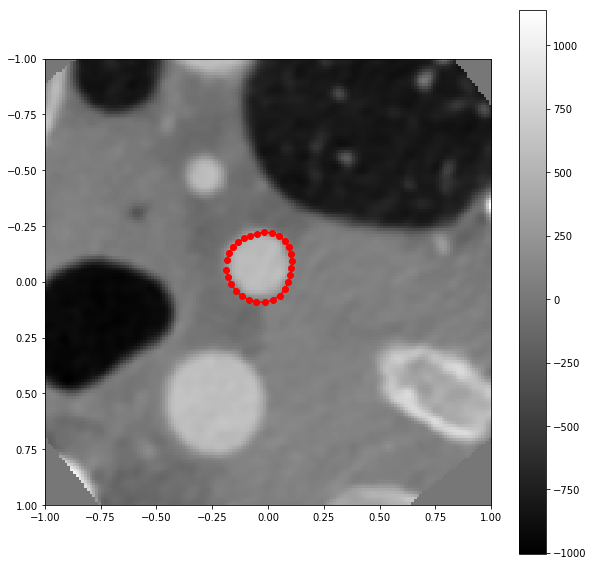

In [17]:
ind = np.random.randint(X.shape[0])

import modules.vessel_regression as vr

c = vr.point_pred_to_contour(Y[ind])

print(c)

plt.figure(figsize=(10,10))
plt.imshow(X[ind], extent=[-1,1,1,-1], cmap='gray')
plt.plot(c[:,0], c[:,1], color='r',marker='o')
plt.colorbar()
plt.show()